# Statsmodels

## Intro

### Libs 0

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
# from matplotlib.dates import DateFormatter
# from matplotlib import dates
# import matplotlib.dates as mdates

In [2]:
# import numpy as np
import pylab
import seaborn as sns
# import statsmodels.api as sm

sns.set_style("whitegrid")
pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)

In [3]:
# %conda install -c conda-forge seaborn==0.11.0

### Libs Hodrick-Prescott Filter

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

### Libs ETS Decomposition

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Libs Holt-Winters Method

In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Hodrick-Prescott filter

In [8]:
file_path = "/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/macrodata.csv"

In [9]:
df = pd.read_csv(file_path, index_col=0, parse_dates=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 23.8 KB


In [11]:
def describe2(df):
    df_des = df.describe()
    df_des.loc['range'] = df_des.loc['max'] - df_des.loc['min']
    return df_des


describe2(df).T

,count,mean,std,min,25%,50%,75%,max,range
year,203.0,1983.876847,14.686817,1959.000,1971.0000,1984.000,1996.5000,2009.000,50.000
quarter,203.0,2.492611,1.118563,1.000,1.5000,2.000,3.0000,4.000,3.000
realgdp,203.0,7221.171901,3214.956044,2710.349,4440.1035,6559.594,9629.3465,13415.266,10704.917
realcons,203.0,4825.293103,2313.346192,1707.400,2874.1000,4299.900,6398.1500,9363.600,7656.200
realinv,203.0,1012.863862,585.102267,259.764,519.1475,896.210,1436.6815,2264.721,2004.957
realgovt,203.0,663.328640,140.863655,460.400,527.9595,662.412,773.0490,1044.088,583.688
realdpi,203.0,5310.540887,2423.515977,1886.900,3276.9500,4959.400,6977.8500,10077.500,8190.600
cpi,203.0,105.075788,61.278878,28.980,41.0500,104.100,159.6500,218.610,189.630
m1,203.0,667.927586,455.346381,139.600,228.6500,540.900,1102.1000,1673.900,1534.300
tbilrate,203.0,5.311773,2.803071,0.120,3.5150,5.010,6.6650,15.330,15.210


In [12]:
# No missing values
df.isnull().sum()

year        0
quarter     0
realgdp     0
realcons    0
realinv     0
realgovt    0
realdpi     0
cpi         0
m1          0
tbilrate    0
unemp       0
pop         0
infl        0
realint     0
dtype: int64

<AxesSubplot:>

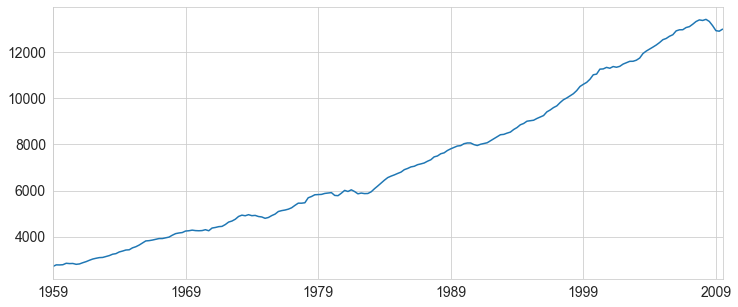

In [13]:
df['realgdp'].plot(figsize=(12, 5), grid=True)

In [14]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'])

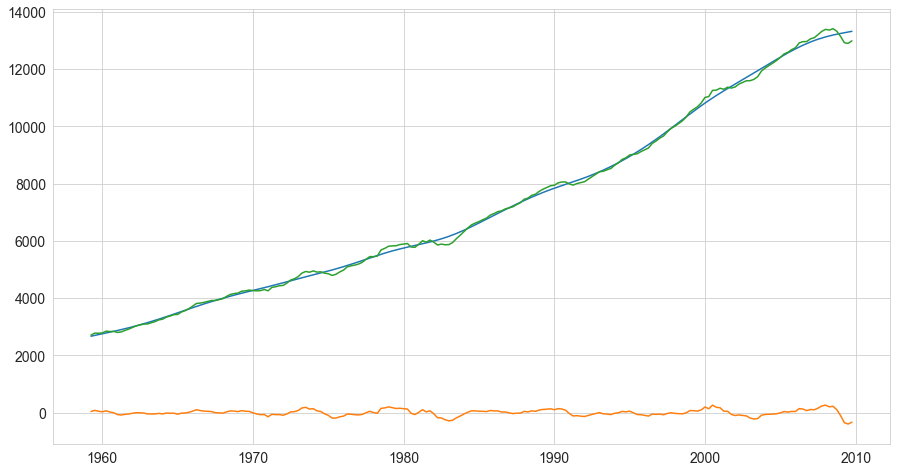

In [15]:
# Add columns to dataframe to see the legend
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(gdp_trend)
ax.plot(gdp_cycle)
ax.plot(df.realgdp)

In [16]:
df['trend'] = gdp_trend

<AxesSubplot:>

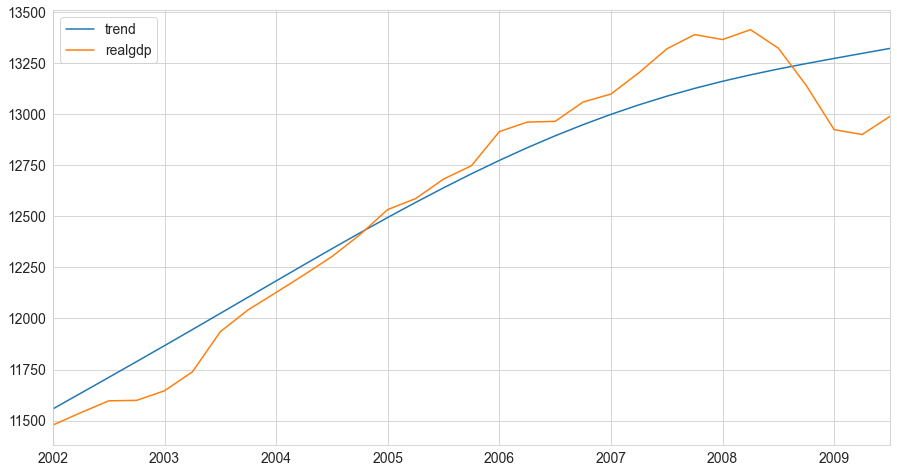

In [17]:
df_gpd = df.loc[:, 'trend realgdp'.split()]
df_gpd.loc['2002':].plot(figsize=(15, 8))

## ETS Models and Decomposition with ETS

In [18]:
file_path = "/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/airline_passengers.csv"

In [19]:
df = pd.read_csv(file_path, index_col='Month', parse_dates=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Thousands of Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [22]:
df.isnull().sum()

Thousands of Passengers    0
dtype: int64

In [23]:
df.sort_values(df.columns[0])

,Thousands of Passengers
Month,
1949-11-01,104
1949-01-01,112
1950-11-01,114
1950-01-01,115
1949-02-01,118
...,...
1960-06-01,535
1959-07-01,548
1959-08-01,559


In [24]:
df['passengers'] = df['Thousands of Passengers']

In [25]:
df.drop('Thousands of Passengers', axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [27]:
df

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

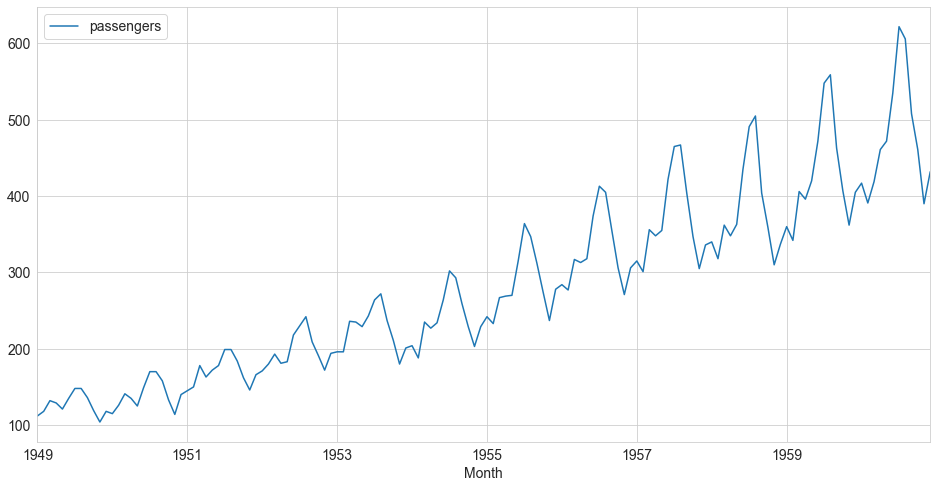

In [28]:
df.plot()

In [29]:
res = seasonal_decompose(df.passengers, model='multiplicative')

In [30]:
# np.array(res.trend)

In [31]:
# res.seasonal

In [32]:
# res.resid

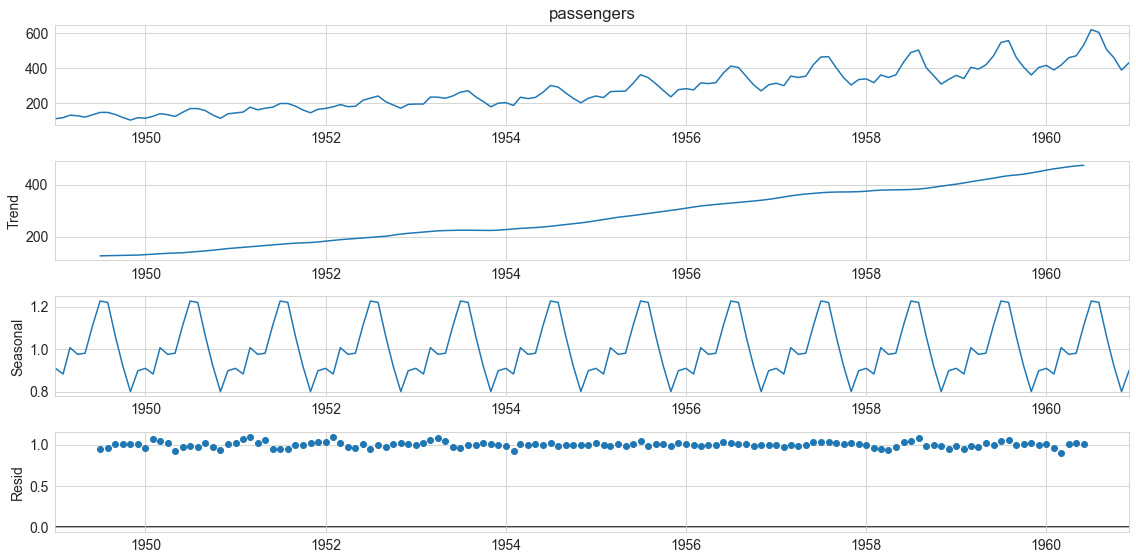

In [33]:
# from pylab import rcParams
# rcParams['figure.figsize'] = (14,8)

res.plot();

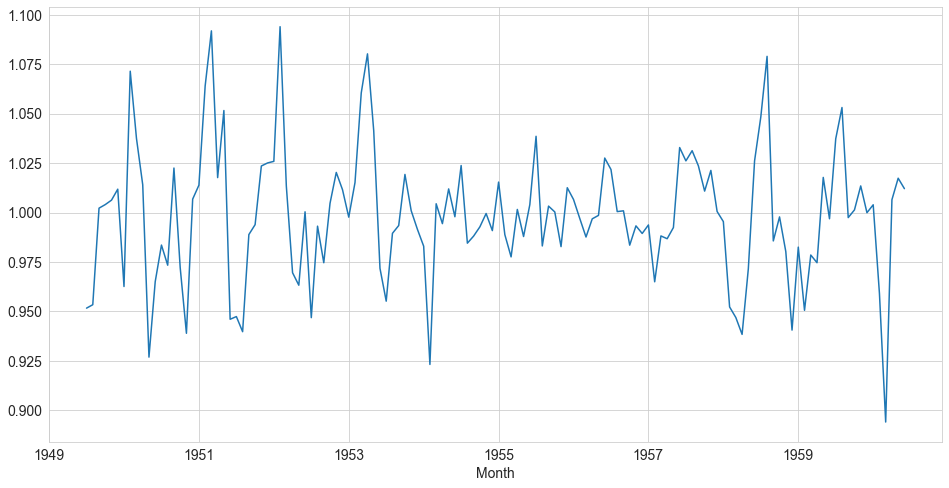

In [34]:
ax = res.resid.plot()

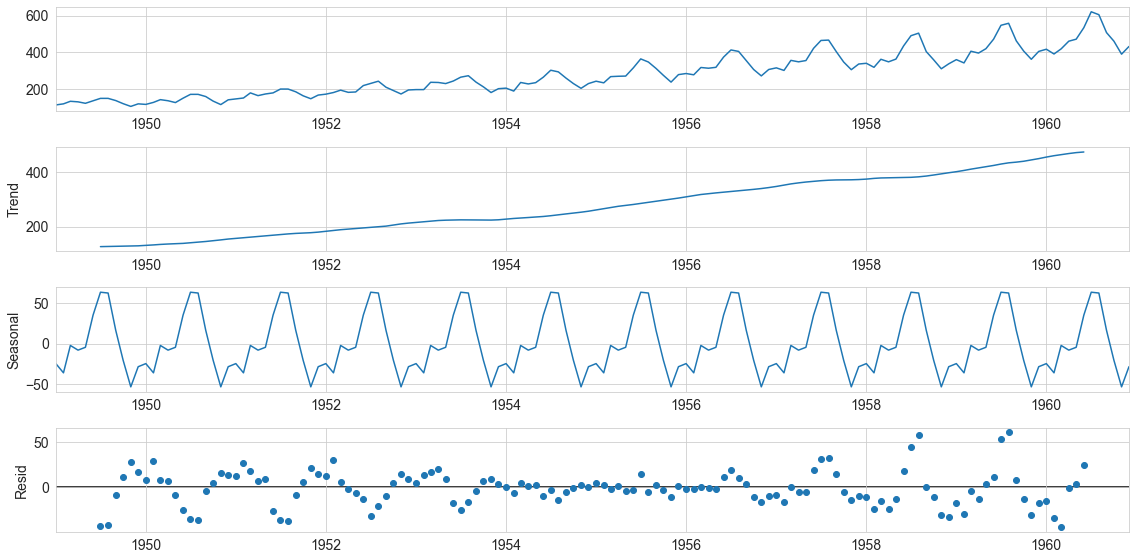

In [35]:
# from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(df, model='add')
result_add.plot();

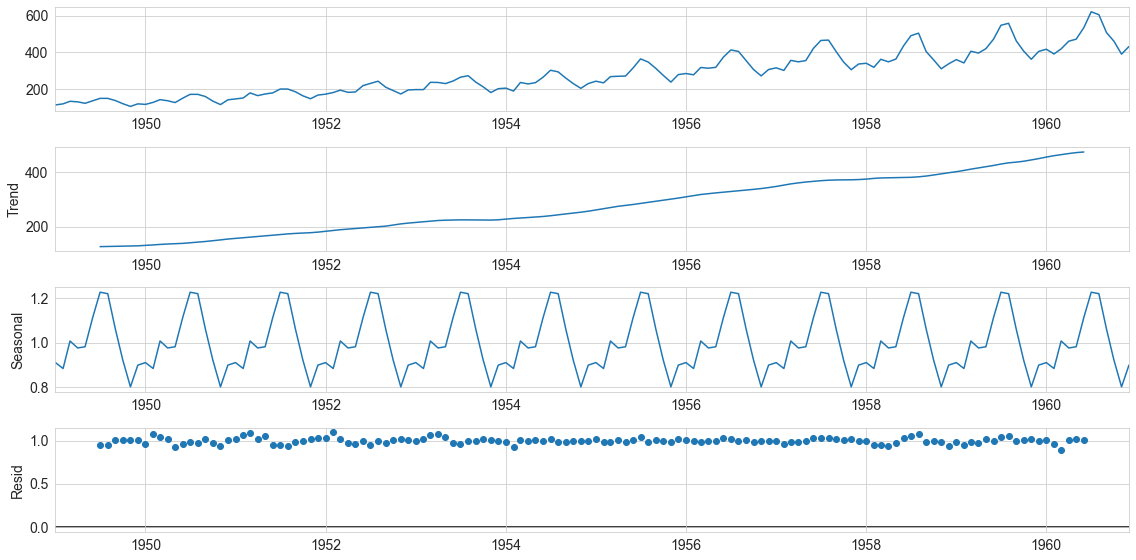

In [36]:
result_mul = seasonal_decompose(df, model='mul')
result_mul.plot();

In [37]:
df

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## EWMA Model

In [38]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

In [39]:
df["SMA(6)"] = df["passengers"].rolling(6).mean()
df["SMA(12)"] = df["passengers"].rolling(12).mean()

In [40]:
df.isna().sum()  # SMA

passengers     0
SMA(6)         5
SMA(12)       11
dtype: int64

<AxesSubplot:xlabel='Month'>

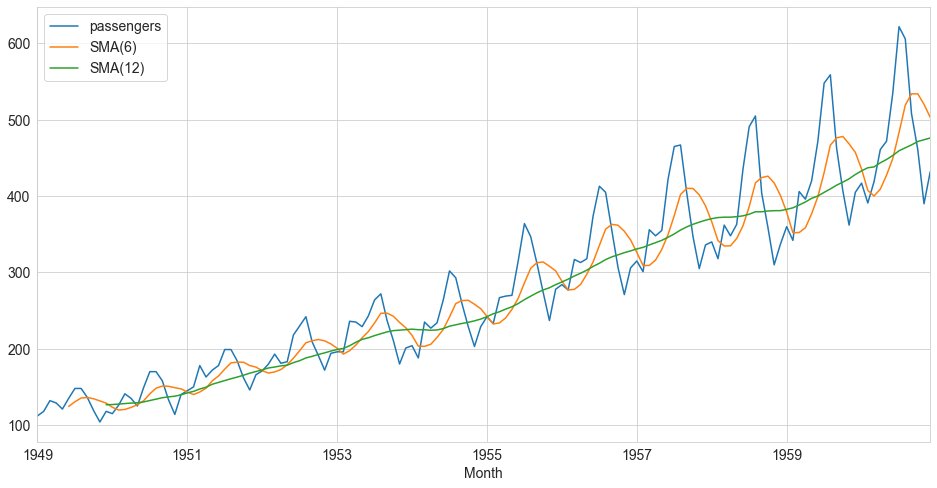

In [41]:
df["passengers SMA(6) SMA(12)".split()].plot()

In [42]:
df['EMA(12)'] = df['passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

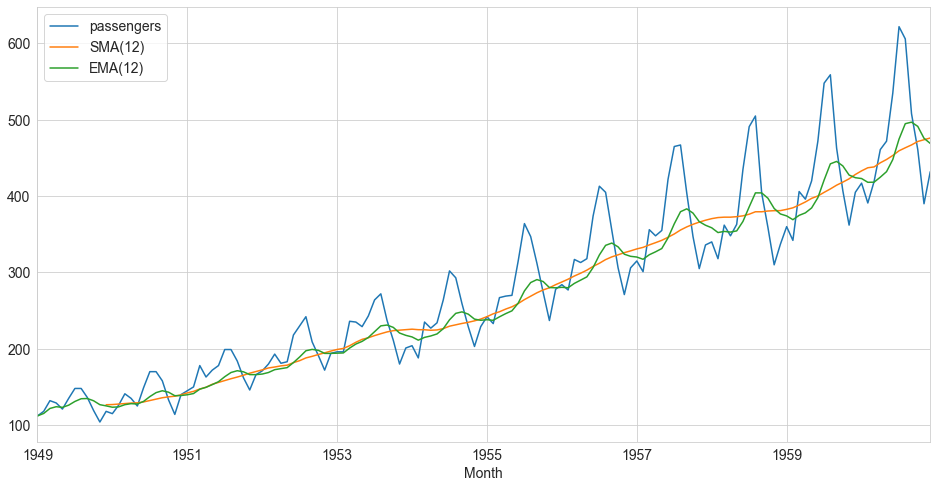

In [43]:
df['passengers SMA(12) EMA(12)'.split()].plot()

## Holt-Winters Method

In [44]:
# import numpy as np
# import pandas as pd

In [45]:
df.passengers

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: passengers, Length: 144, dtype: int64

In [46]:
# Note the frequency attribute at the end
df.passengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [47]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
df.passengers.index.freq = 'MS'

In [48]:
df.passengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [49]:
# from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [50]:
span = 12
alpha = 2 / (span + 1)

In [51]:
df['EWMA(12)'] = df.passengers.ewm(alpha=alpha, adjust=False).mean()

In [52]:
df.head()

,passengers,SMA(6),SMA(12),EMA(12),EWMA(12)
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,112.923077
1949-03-01,132,NaN,NaN,121.787529,115.857988
1949-04-01,129,NaN,NaN,124.064224,117.879836
1949-05-01,121,NaN,NaN,123.231685,118.359861


<AxesSubplot:xlabel='Month'>

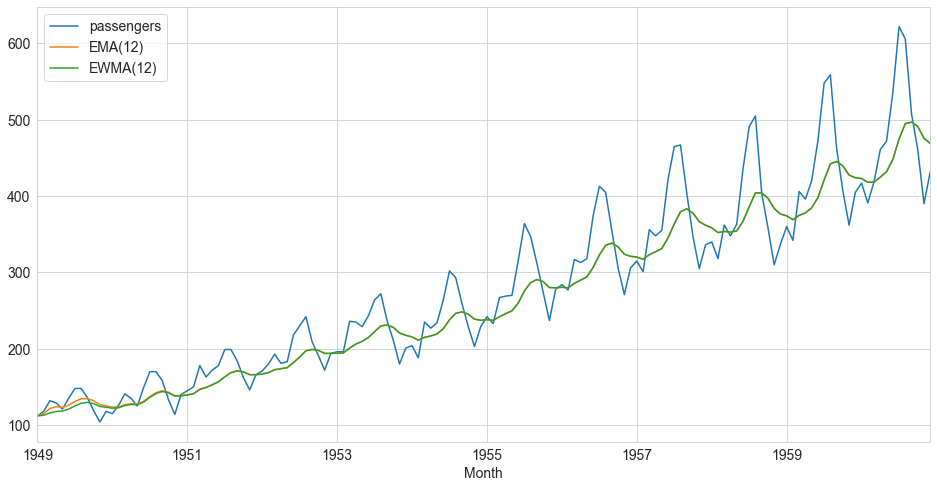

In [53]:
df['passengers EMA(12) EWMA(12)'.split()].plot()

In [54]:
model = SimpleExpSmoothing(df.passengers)

In [55]:
f_model = model.fit(smoothing_level=alpha, optimized=False)

In [56]:
df['sEWMA(12)'] = f_model.fittedvalues.shift(-1)

In [57]:
df.head()

,passengers,SMA(6),SMA(12),EMA(12),EWMA(12),sEWMA(12)
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861


<AxesSubplot:xlabel='Month'>

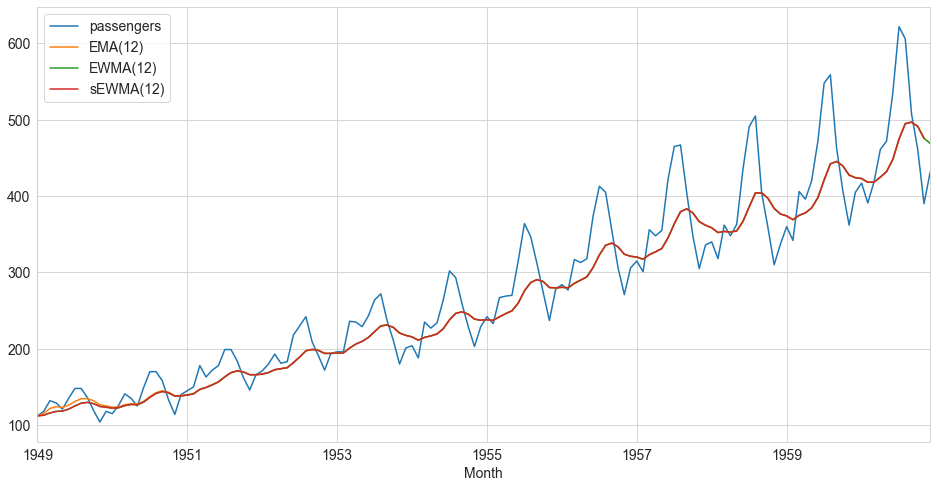

In [58]:
df['passengers EMA(12) EWMA(12) sEWMA(12)'.split()].plot()

In [63]:
m = SimpleExpSmoothing(df.passengers)
f_m = m.fit()

In [64]:
m.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
# Note the high alpha -> the current value is heavily weighted and the weighting function decreases extremely fast
df['sEWMA(12)_default'] = f_m.fittedvalues.shift(-1)

In [68]:
# f_model2.params

In [69]:
df.head()

,passengers,SMA(6),SMA(12),EMA(12),EWMA(12),sEWMA(12),sEWMA(12)_default
Month,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077,117.970000
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988,131.929850
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836,129.014649
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861,121.040073


<AxesSubplot:xlabel='Month'>

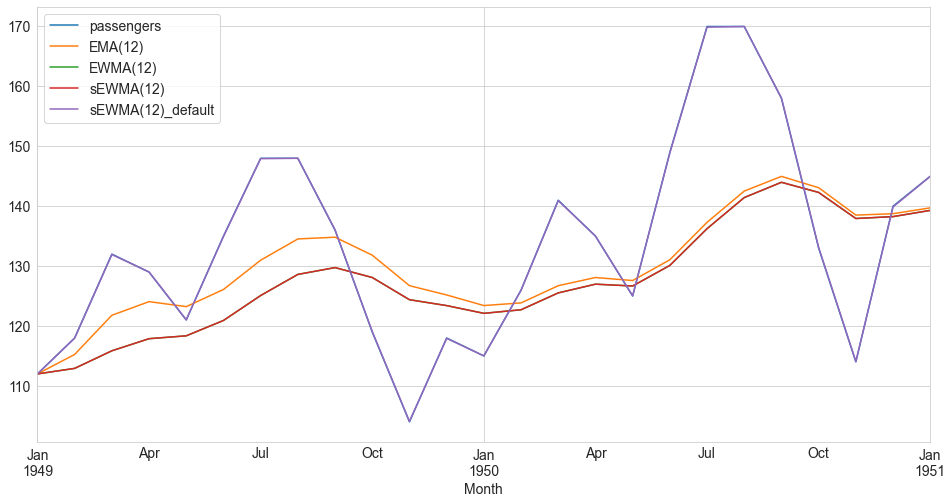

In [70]:
df['passengers EMA(12) EWMA(12) sEWMA(12) sEWMA(12)_default'.split()][:25].plot(
)

In [71]:
model = ExponentialSmoothing(df.passengers, trend='add')

In [72]:
f_model = model.fit()

In [73]:
df['DES(12)_add'] = f_model.fittedvalues.shift(-1)

In [74]:
# df.tail()

In [75]:
# df.columns

<AxesSubplot:xlabel='Month'>

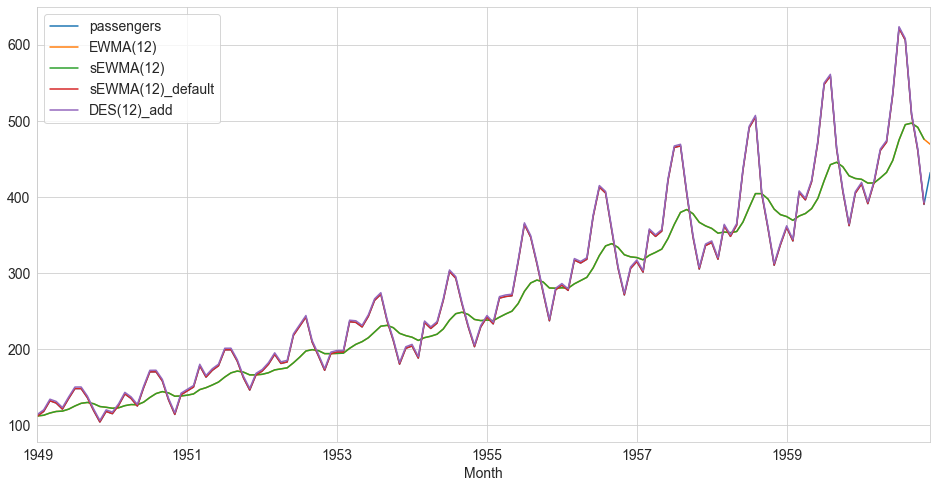

In [76]:
df[['passengers', 'EWMA(12)', 'sEWMA(12)', 'sEWMA(12)_default',
    'DES(12)_add']].plot()

<AxesSubplot:xlabel='Month'>

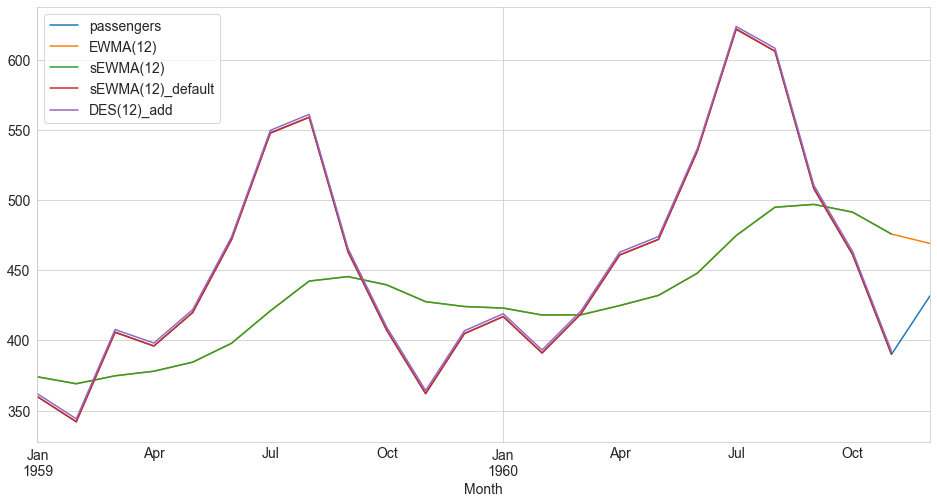

In [77]:
# Consider the last two years of data
df[['passengers', 'EWMA(12)', 'sEWMA(12)', 'sEWMA(12)_default',
    'DES(12)_add']].iloc[-24:].plot()

In [78]:
df.columns

Index(['passengers', 'SMA(6)', 'SMA(12)', 'EMA(12)', 'EWMA(12)', 'sEWMA(12)',
       'sEWMA(12)_default', 'DES(12)_add'],
      dtype='object')

In [79]:
df['DES(12)_mul'] = ExponentialSmoothing(
    df.passengers, trend='mul').fit().fittedvalues.shift(-1)

In [80]:
df.head()

,passengers,SMA(6),SMA(12),EMA(12),EWMA(12),sEWMA(12),sEWMA(12)_default,DES(12)_add,DES(12)_mul
Month,,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077,117.970000,120.040657,120.031669
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988,131.929850,134.001539,134.235979
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836,129.014649,131.085845,131.270786
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861,121.040073,123.110263,123.156267


<AxesSubplot:xlabel='Month'>

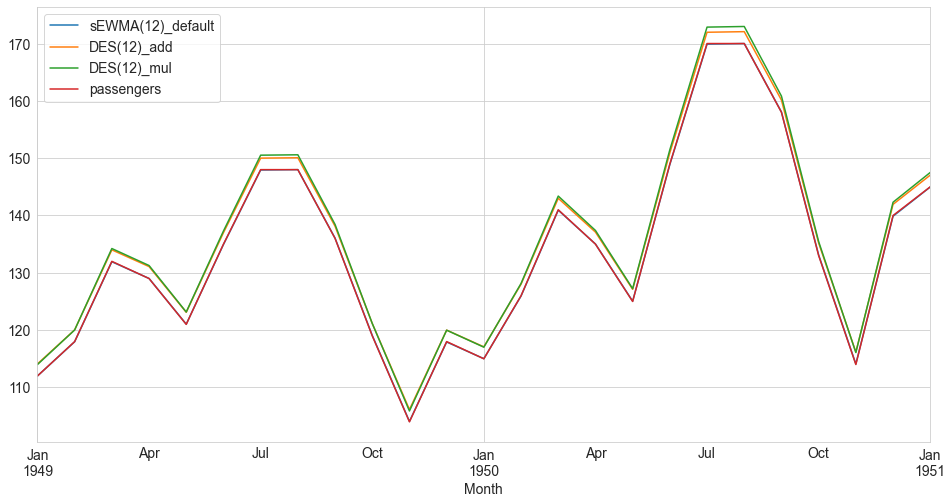

In [82]:
# Consider the first two years of data
df[['sEWMA(12)_default', 'DES(12)_add', 'DES(12)_mul',
    'passengers']].iloc[:25].plot()

In [87]:
df['ETS_default'] = ExponentialSmoothing(df.passengers).fit().fittedvalues.shift(-1)

In [88]:
df.columns

Index(['passengers', 'SMA(6)', 'SMA(12)', 'EMA(12)', 'EWMA(12)', 'sEWMA(12)',
       'sEWMA(12)_default', 'DES(12)_add', 'DES(12)_mul', 'ETS_default'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

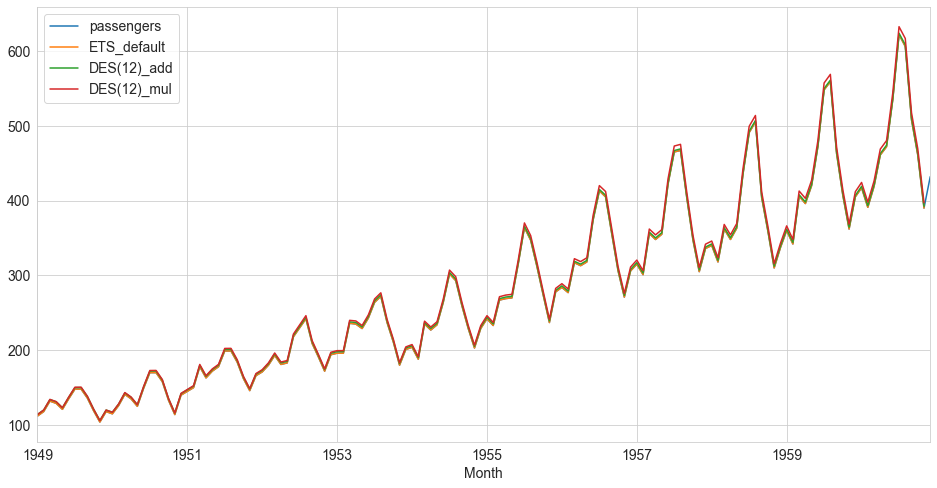

In [89]:
df['passengers ETS_default DES(12)_add DES(12)_mul'.split()].plot()

In [96]:
df['ETS_add'] = ExponentialSmoothing(df.passengers,trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

In [115]:
df['ETS_mul'] = ExponentialSmoothing(df.passengers, trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

/Users/aceituno/opt/anaconda3/envs/tsa_course/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [117]:
df.head()

,passengers,SMA(6),SMA(12),EMA(12),EWMA(12),sEWMA(12),sEWMA(12)_default,DES(12)_add,DES(12)_mul,ETS_default,ETS_mul,ETS_add
Month,,,,,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000,112.000000,114.102394,113.990701,112.0,NaN,111.959998
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077,117.970000,120.040657,120.031669,118.0,NaN,120.193337
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988,131.929850,134.001539,134.235979,132.0,NaN,134.676835
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836,129.014649,131.085845,131.270786,129.0,NaN,131.407263
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861,121.040073,123.110263,123.156267,121.0,NaN,124.643743


<AxesSubplot:xlabel='Month'>

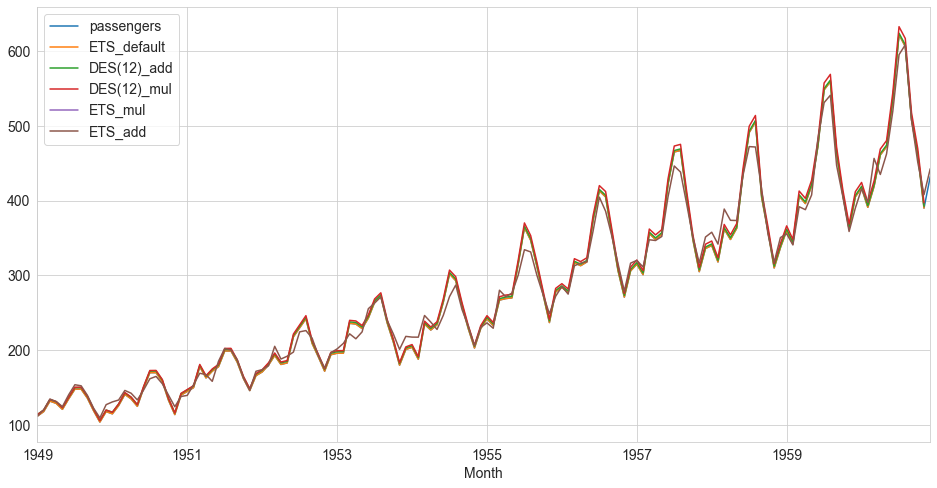

In [118]:
df['passengers ETS_default DES(12)_add DES(12)_mul ETS_mul ETS_add'.split()].plot()